<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT_422_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Neural Networks

A model similiar to how the brain functions, where Artificial Neural Networks are connected layers on nodes

## 3.7.1 Mathematical Formulation

Weights will be represented as $w_i$, bias as $b$, and layers as $l$.
* $\hat{y} = σ(𝓩) = σ(w_1a_1 + w_2a_2 + b)$
* The equation above describes the image below

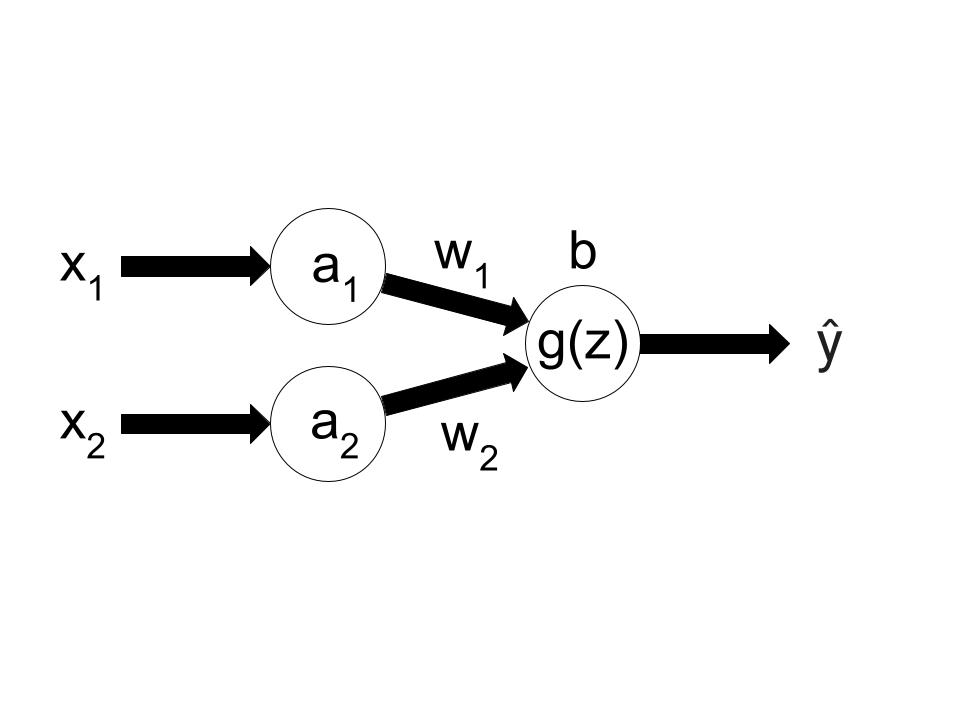

* Above is a simple network, but a a general network may have thousands of nodes. The leftmost variables, $x_i$, are the inputs, while the rightmost variable, $\hat{y}$, is the output. It learns by adjusting the weights, $w_i$, based on the learning rule and the error value. This process repeats until the output is similiar enough to the input, then it terminates.
  * This process is known as supervised learning

* The mathematical notation for a neural network is
  * $z^{(l)}_{j'} = ∑^{J_{l-1}}_{j=1} w_{(j,j')}^{(l)}a^{(l-1)}_j + b^{(l)}_{j'}$
    * $J_I$ means the number of nodes in layer $l$
* Given an activation function, $σ$, the equation for the next layer is
  * $a^{(l)}_{j'} = σ(z^{(l)}_{j'})$
* In matrix form,
  * $z^{(l)} = W^{(l)}a^{(l-1)}+b^{(l)}$, and
    * $a^{(l)} = σ(z^{(l)}) = σ(W^{(l)}a^{(l-1)} + b^{(l)})$

## 3.7.2 Activation Functions

* **Activation Function**: It represents the output of a node given input or a set of inputs for purposes such as classification. It is defined by the following equation, where σ represents the activation function
  * $a^{(l)} = σ(z^{(l)}) = σ(W^{(l)}a^{(l-1)}+b^{(l)})$
* The following are various **Activation functions**:
  * **Step Function**: Known also as Heaviside step function, or the unit step function. Represents a switch that turns on at a specified time. Useful for classification problems. Defined as
    * σ(x) = \begin{cases} 0, & x<0\\1, & x≥0 \end{cases}
  * **ReLU**: Rectified Linear Units, or ReLU for short, is one of the most used activation functions. It's very useful for effective training of large and complex datasets. The signal fully passes unaltered or dies completely, as defined by the function below
    * $σ(x) = max(0,x)$
  * **Sigmoid**: Also known as the logistic function. Useful for predicting probability. Defined by the function
    * $σ(x) = \frac{1}{1 + e^{-x}}$
  * **Softmax Function**: Converts a vector of numbers into vector probabilities, where the probabilities are relative to the values in the number vector. Often used in the final output layer of a neural network, especially for classification problems. Defined as the following equation
    * $\frac{e^{z_k}}{∑^K_{k=1} e ^{z_k}}$, where K is the array of values

## 3.7.3 Cost Function

* We will use the least squares for the cost function. It is defined as the equation
  * $J = \frac{1}{2} ∑^K_{n=1} ∑^K_{K=1} (\hat{y}^{n}_k - y^n_k)^2$
    * Where $y^n$ is the independent input data, $\hat{y}^n$ is the corresponding output data(forecast output), and $k$ is the *k*-th node
* For classification problems with only one output, the cost function is defined as
  * $J = - ∑^N_{n-1}(y^n ln(\hat{y}^n)+(1-y^n)ln(1-\hat{y}^n))$

## 3.7.4 Backpropagation

* **Back-propagation**: The essence of neural network training. It is the process of adjusting the weights of the neural network based on the error rate in the previous iteration. This makes the model able to be more generalized. To do this we want to minimize the cost function, $J$, with respect to $W$ and $b$.
Using gradient descent we the derivatives of J with respect to the $w$ and $b$. We focus on layer $l$ and node $j'$ and node $j$ from layer $l-1$
  * So we have partial derivatives
    * $\frac{∂J}{∂w^{(l)}_{j, j′}}$
    * $\frac{∂J}{∂b^{(l)}_{j′}}$
  * At the end, we can find $δ$ in a layer if we know the $δ$s to the right of it. The final equation is
    * $\frac{∂J}{∂w_{j, j′}^{(l)}} = δ_{j'}^{(l)}a_j^{(l-1)}$
  * The derivatives of the cost function $J$, can be written in terms of $δ$s. The derivative of the cost function to the bias, $b$, is

    * $\frac{∂J}{∂b_{j′}^{(l)}} = δ_{j'}^{(l)}$


## 3.7.5 Backpropagation Algorithm

* We can derive the backpragation algorithm as follows(based on the informatio above). We pick weights and biases randomly. Assuming we are using the quadratic cost function in one dimension, we define it as
  * $δ^L = \frac{dg^L}{dz}|_{z_j^L}(\hat{y}-y)$
* Going to the left gives
  * $δ^{(l-1)} = \frac{dg^{(l-1)}}{dz}|_{z_j^{(l-1)}} ∑ δ^{(l)}_{j'} w^{(l)}_{j, j'}$
* Then we update the weights with the formulas
  * New $w^{(l)}_{j, j′} =$ Old $w^{(l)}_{j, j′} −β\frac{∂J}{∂w^{(l)}_{j, j′}}=$ Old $w^{(l)}_{j, j′} − βδ^{(l)}_{j′} a^{(l−1)}_j $
  * New $b^{(l)}_{j′} =$ Old $b^{(l)}_{j′} −β\frac{∂J}{∂b^{(l)}_{j′}}=$ Old $b^{(l)}_{j′} − βδ^{(l)}_{j′}$

In [8]:
import numpy as np

#Implemented using sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
  def __init__(self, input_size, hid_size, out_size, learning_rate = 0.1):
    #Initialize the data
    self.input_size = input_size
    self.hidden_size = hid_size
    self.output_size = out_size
    self.output_size = out_size
    self.learning_rate = learning_rate
    self.initialize_weights()

  def initialize_weights(self):
    #initialize the data
    self.weights_hid_in = np.random.rand(self.input_size, self.hidden_size)
    self.weights_hid_out = np.random.rand(self.hidden_size, self.output_size)
    self.bias_hid = np.random.rand(1, self.hidden_size)
    self.bias_out = np.random.rand(1, self.output_size)


  def feedforward(self, X):
    #Hidden Layer
    self.hid_layer = sigmoid(np.dot(X, self.weights_hid_in) + self.bias_hid)
    #Out Layer
    self.out_layer = sigmoid(np.dot(self.hid_layer, self.weights_hid_out) + self.bias_out)

    return self.out_layer

  def backprop(self, X, y):
    output_error = y - self.out_layer
    output_delta = output_error * sigmoid_derivative(self.out_layer)

    hid_error = output_delta.dot(self.weights_hid_out.T)
    hid_delta = hid_error * sigmoid_derivative(self.hid_layer)

    self.weights_hid_out += self.hid_layer.T.dot(output_delta) * self.learning_rate
    self.weights_hid_in += X.T.dot(hid_delta) * self.learning_rate

  def train(self, X, y, epochs = 10000):
    for epoch in range(epochs):
      output = self.feedforward(X)
      self.backprop(X, y)
      if epoch % 1000 == 0:
        loss = np.mean(np.square(y - output))
        print(f"Epoch {epoch}, Loss: {loss}")

  def predict(self, X):
    return self.feedforward(X)

#Xor gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(2, 2, 1)
nn.train(X, y)
print("\nPredictions: \n", nn.predict(X))

Epoch 0, Loss: 0.2658995583224278
Epoch 1000, Loss: 0.24972594853528368
Epoch 2000, Loss: 0.24765675955883498
Epoch 3000, Loss: 0.23918583214231293
Epoch 4000, Loss: 0.22047693203654745
Epoch 5000, Loss: 0.1985426441110857
Epoch 6000, Loss: 0.17792667470584927
Epoch 7000, Loss: 0.16002143925949686
Epoch 8000, Loss: 0.1445971766560612
Epoch 9000, Loss: 0.13130057044623764

Predictions: 
 [[0.29337788]
 [0.66624638]
 [0.66628838]
 [0.41273729]]


In each iteration, the code is minimizing the loss, as we see it gradually decrease by a smaller value each time. Like how we find the lowest point in gradient descent. Then we find the predictions and assign probabilities based on if the neural network predicts if output similates an xor gate.